# US Bike Rental Dataset
Many U.S. cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.You can download the data from the University of California, Irvine's website. The file contains 17380 rows and each row represents the number of bike rentals for a single hour of a single day.


The primary target for our predictive models will be the 'cnt' column, which is the total number of bike rentals at a given hour. 'Casual' and 'Registered' columns adds up to total number of bike rentals.

In [1]:
# Depandencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
sns.color_palette("pastel")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Import Dataset
df= pd.read_csv('bike_rental_hour.csv')


##Data Exploration 


In [4]:

df.head(5)
df.tail(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


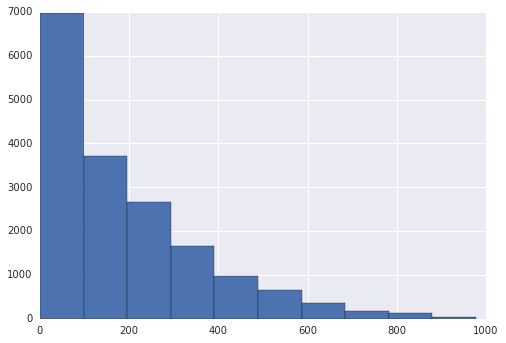

In [4]:
plt.hist(df.cnt, bins=10)
plt.show()

In [8]:
df.shape

(17379, 17)

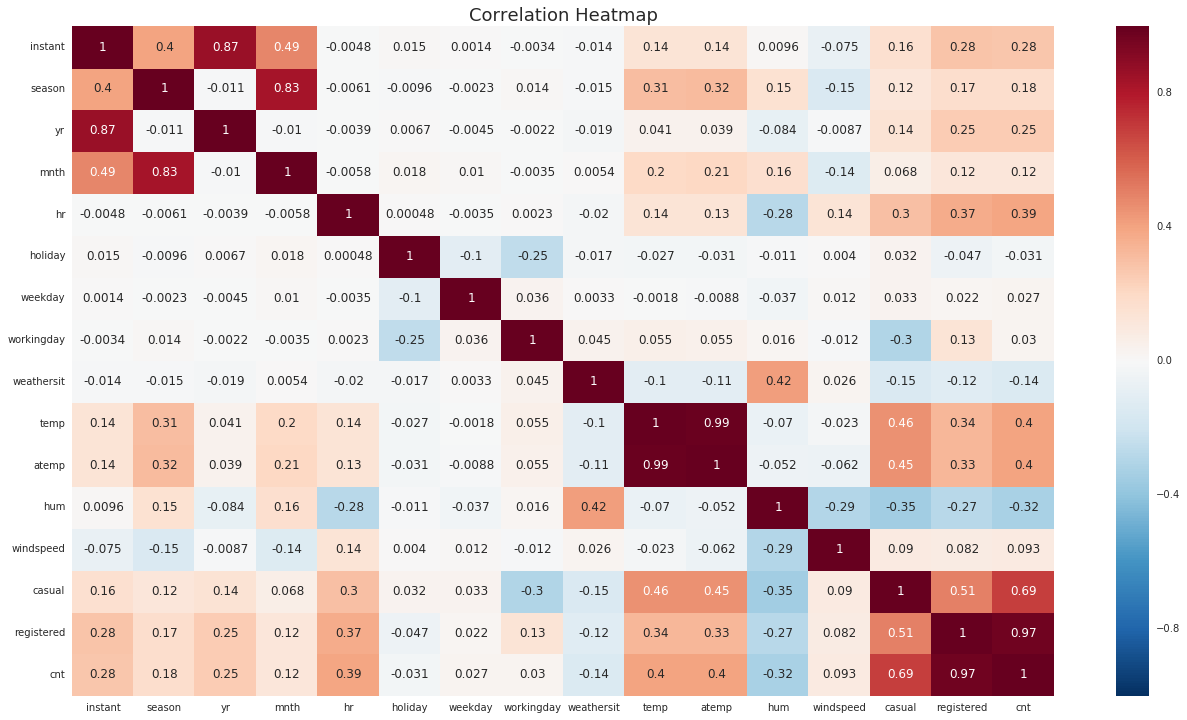

In [5]:
plt.figure(figsize=(22, 12))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18});
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

#Correlation Matrix shows:

There is a weak correlation between the number of bikes rented and temperature, rental hour, and rental year. Based on this statistical data, we can formulate hypotheses to investigate 
1. Whether bike rentals are higher in certain seasons?
2. How they are affected by the time of day? 
3. Whether some years have seen more rentals than others?




In [6]:
# Transforming Time Metrics

In [7]:
df['hr']=df['hr'].astype(str)
df['datetime']= df['dteday']+ ' '+ df['hr']+ ':00:00'
df['hr']=df['hr'].astype(int) # return in to type int
# transform the new column to datetime
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'].head(4)

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
Name: datetime, dtype: datetime64[ns]

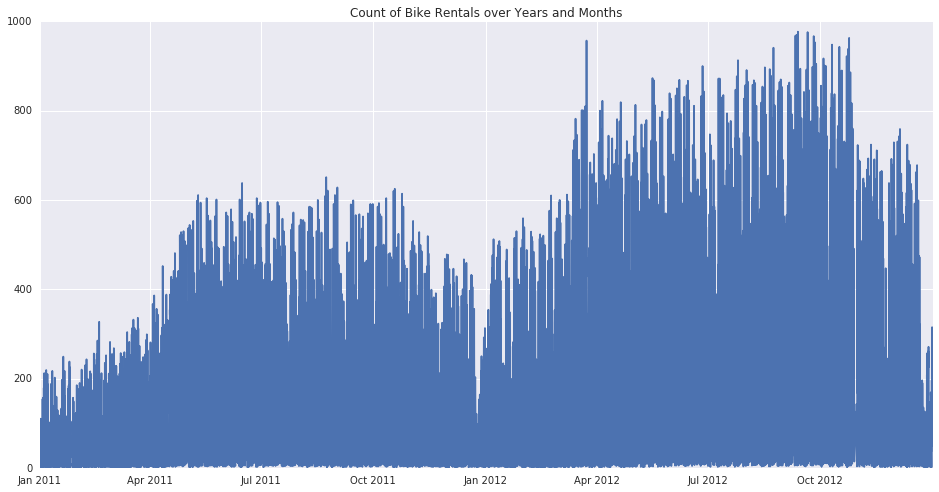

In [8]:
plt.figure(figsize = (16, 8))
plt.plot(df['datetime'], df['cnt'])
plt.title('Count of Bike Rentals over Years and Months')
plt.show()

According to the above graph, bike rentals are higher between April to October compared to other months. Additionally, it appears that there were more bike rentals in 2012 compared to the previous year. However, it is unclear from the graph whether the time of day has any impact on bike rentals.

In [9]:
def assign_label(hour):
    if hour<=6 & hour>=11:
        return 1
    elif hour<=12 & hour>=17:
        return 2
    elif hour<=18 & hour>=23:
        return 3
    else:
        return 4
    
        
    

In [10]:
df['time_label']= df['hr'].apply(assign_label)

Predictive Models

We will use a series of predictive models to test which performs best at predicting number of bike rentals. The values that we will be predicting are cnt:

We will use following evaluation matrix for the model:

1. RMSE - tells us how close our predicted values are from the actual value for the testing dataset. High penalty for large errors.
 - Determines model accuracy.
 - RMSE of 0 is a perfect model.
2. MAE - tells us how close our predicted values are from the actual value for the testing dataset. Low penalty for large errors.
 - Determines model accuracy.
 - MAE of 0 is a perfect model.
3. R2 - explains how well the proportion of variance is explained by the model.
 - Determines model precision.
 - An R2 of 1 means our model perfectly explains variance.

#Linear Regression

We will start with a basic linear regression model. 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:

train= df.sample(frac=.80)
test = df.loc[~df.index.isin(train.index)]

In [13]:
# Model 1 Linear Regression
from sklearn.linear_model import LinearRegression
predictors = np.array(df.columns.drop(['instant', 'casual', 'registered', 'cnt', 'dteday', 'datetime']))

reg = LinearRegression()
reg.fit(train[predictors], train["cnt"])

import numpy
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)
     

20331.997713163477

Linear Regression model shows high error, which may be due to the fact that the data has a few extremely high rental counts but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

In [14]:
# Model 2 DecisionTree
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["cnt"])

import numpy
predictions = reg.predict(test[predictors])
numpy.mean((predictions - test["cnt"]) ** 2)

3172.695135495393

Decison Tree :By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

In [15]:
# Model 3 RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
reg= RandomForestRegressor(min_samples_leaf=2)
reg.fit(train[predictors], train["cnt"])

import numpy
predictions = reg.predict(test[predictors])
numpy.mean((predictions - test["cnt"]) ** 2)

2077.9073865005544

In [ ]:
Conclusions
In this project we tried to predict the number of bike rentals for each hour during the day, given the information about different calendar and weather particularities. After a short data processing and feature engineering we trained 3 regression models:

- Linear regression
- Decision tree regressor
- Random forests regressor

As a result of the analysis, we can conclude that the random forests algorithm is the most accurate for the given task and data. The results of the best model are the following:
2077.90 is the lowest MSE indicates that the model's predictions are
closer to the actual values.